## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_df = pd.read_csv('ab_data.csv')
ab_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab_df.shape  # return (number of raws, number of column)
# ab_df.shape[0] will be good but I wanna see the number of columns as well

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
ab_df.nunique().user_id
# len(ab_df.user_id.unique())  can do the same

290584

d. The proportion of users converted.

In [5]:
round(ab_df.converted.mean(), 2)

0.12

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
ab_df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

In [7]:
1928+1965  # the number of times the new_page and treatment don't line up is when we have 
           # a control new page or a treatment old page

3893

f. Do any of the rows have missing values?

In [8]:
ab_df.isna().sum().sum()  # we have no missing values

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
# ab_df2 = ab_df.query('(group=="control" & landing_page=="old_page") or (group=="treatment" & landing_page=="new_page")')
ab_df2 = ab_df.query('(group=="treatment") == (landing_page=="new_page")')
# Either way is good.

In [10]:
# Double Check all of the correct rows were removed - this should be 0
ab_df2[((ab_df2['group'] == 'treatment') == (ab_df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
ab_df2.nunique().user_id
# len(ab_df2.user_id.unique())  can do the same

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
ab_df2.user_id.value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
         ..
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
ab_df2[ab_df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
ab_df2.drop(index=2893, inplace=True)

C:\Users\al-ghaly\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
ab_df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
ab_df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
ab_df2.query('group=="treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
values = ab_df2.landing_page.value_counts()
p_new = values['new_page'] / values.sum()
p_new
# There was many ways to do that but I think this is more efficient 

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**No**
>From the first sight it seems that the conversion rate for control group is slightly more than for the treatment group.
Knowing that (From answer d) the number of control users is almost equal the number of treatment users we cannot see any sufficient evidence.
but at the end of the day it is not the time to judge that we are just kicking off.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$: $p_{old}$ >= $p_{new}$ <br>$H_{1}$: $p_{new}$ > $p_{old}$**
>The null hypotheses will be that the new page won't convert more people. <br>While the alternative hypotheses will be that the new page will increase the conversion rate. 


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

In [19]:
p_new = p_old = ab_df2.converted.mean()  # under the null hypothesis 𝑝𝑛𝑒𝑤 and 𝑝𝑜𝑙𝑑 equal to the converted rate in ab_data.csv regardless of the page.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new  # the same as the observed value

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old  # the same as the observed value

0.11959708724499628

Use a sample size for each page equal to the ones in ab_data.csv so :

c. What is $n_{new}$?

In [22]:
n_new = ab_df2.landing_page.value_counts().new_page  # the number of people receiving a new page
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = ab_df2.landing_page.value_counts().old_page  # the number of people receiving an old page
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = ab_df2.sample(n_new, replace=True).query('landing_page=="new_page"').converted

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = ab_df2.sample(n_old, replace=True).query('landing_page=="old_page"').converted

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
p_new = new_page_converted.mean()
P_old = old_page_converted.mean()
p_new, p_old, p_new - p_old

(0.12054261426363436, 0.11959708724499628, 0.0009455270186380788)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

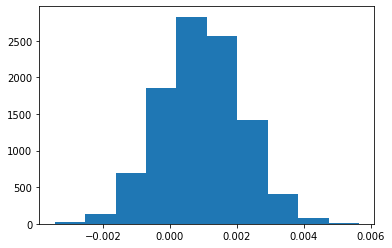

In [28]:
plt.hist(p_diffs);

In [29]:
mean, std = p_diffs.mean(), p_diffs.std()
mean, std

(0.000949940526481296, 0.0011993859733953518)

In [30]:
np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5)

(-0.0013786179942181659, 0.003273848216521163)

So with 95% confidence we are pretty sure that the difference in mean will be between -.0043 and .0005

To be more confident we will simulate what we would expect the sampling distribution to be if the null hypothesis is true.

In [31]:
p_observed = ab_df2.query('group=="treatment"').converted.mean() - ab_df2.query('group=="control"').converted.mean()

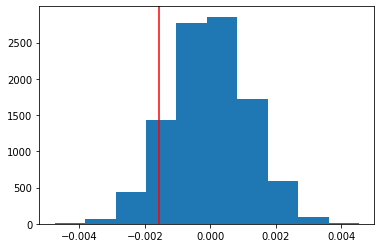

In [32]:
null_values = np.random.normal(0, std, size=10000)
plt.hist(null_values);
plt.axvline(x=p_observed, color='red');

In [33]:
p_value = (null_values > p_observed).mean()
p_value

0.9033

**Note: there are no matching problem<br>
But as we can see from the plot it is close to the normal ditribution with mean close to 
Zero which matches what we expected from the null.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
(p_diffs > p_observed).mean()

0.9838

**Note that there is 39.28% of the simulated differences greater than the actual difference in the data but this is not the P_VALUE as the P_VALUE is the one obtained assuming that the null is True which is ##90.72% in our case**

**As we see 39.28% of the simulated differences are greater than the observed difference**
> .3928 is a pretty big value and with .9072 P_VALUE there is no statistical significance to reject the null.

In [35]:
ab_df2['timestamp'] = pd.to_datetime(ab_df2['timestamp'])
ab_df2.timestamp.max() - ab_df2.timestamp.min()

C:\Users\al-ghaly\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Timedelta('21 days 23:59:49.081927')

**As we can see the A|B test run for 22 days which is not long enough time to check our hypothesis as there are many factors affecting the accuracy of the results like(Change Aversion - Novelty Effect - and more).**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we have just calculated is called the P_VALUE<br>This value indicates that there is no significant evidence  that the new page is better than the old one.<br>With a 91% (big value) we cannot reject the null as there is great probability that the simulated value comes from the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
convert_old = ab_df2.query('group == "control"').converted.sum()
convert_new = ab_df2.query('group == "treatment"').converted.sum()
# The coming two is already declared before.
# n_old = 
# n_new = 

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [37]:
success = (p_diffs > 0).sum()
proportions_ztest(convert_old, n_old, p_observed)

(142.85419853829586, 0.0)

In [38]:
proportions_ztest(convert_new, n_new, p_observed)

(141.8295142574791, 0.0)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z score is around 140 and a p value of zero Which does not agree with what we have done before**

## Now lets explore only the last week ot the experiment to see if the timing has something to do with the results

In [39]:
new_df = ab_df2.query('timestamp.dt.day > 17')
new_df.head()  # Only the data for the last week

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
10,929503,2017-01-18 05:37:11.527370,treatment,new_page,0
11,834487,2017-01-21 22:37:47.774891,treatment,new_page,0


In [40]:
# lets have a look first at the conversion rate for each group to see if it worths the test
P_old, p_new = new_df.query('group=="control"').converted.mean(), new_df.query('group=="treatment"').converted.mean()
P_old, p_new

(0.12149554239904167, 0.11930285635244485)

## It seems like even the last week of the experiment with biased slightly towards the old page but lets see what about the first week


In [41]:
new_df = ab_df2.query('timestamp.dt.day < 9')
new_df.head()  # Only the data for the last week

,user_id,timestamp,group,landing_page,converted
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
17,888545,2017-01-08 06:37:26.332945,treatment,new_page,1
26,892356,2017-01-05 09:35:14.904865,treatment,new_page,1
29,736159,2017-01-06 01:50:21.318242,treatment,new_page,0


In [42]:
# lets have a look first at the conversion rate for each group to see if it worths the test
P_old, p_new = new_df.query('group=="control"').converted.mean(), new_df.query('group=="treatment"').converted.mean()
P_old, p_new

(0.11945408609005691, 0.11782115425269538)

In [43]:
p_new - p_old

-0.001775932992300902

## It seems like the time stamp has nothing to do with the observed statistic. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**A logistic Regression will be the best fit for binary response**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
ab_df2['intercept'] = 1
ab_df2['ab_page'] = pd.get_dummies(ab_df2['group'])['treatment']
ab_df2.head()

C:\Users\al-ghaly\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\al-ghaly\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [45]:
lm = sm.Logit(ab_df2['converted'], ab_df2[['intercept', 'ab_page']])
result = lm.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        18:19:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P_VALUE associated with the ab_page is .19 and is different cuz the null and alternative hypothesis are different in each case**
>Here the null hypothesis is that the old page conversion rate is the same as the new page conversion rate.<br>But the previous null was that the new page conversion rate is greater than the old page conversion rate.

THE LOGISTIC REGRESSION --> <br> **$H_{0}$: $p_{old}$ >= $p_{new}$ <br>$H_{1}$: $p_{new}$ > $p_{old}$**
<br><br>THE A|B TEST            --> <br> **$H_{0}$: $p_{old}$ = $p_{new}$ <br>$H_{1}$: $p_{new}$ != $p_{old}$**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We want to add any factors that may affect the response variable to get accurate results and real vision on the data but on the other hand we don't want to add exploratory variables that are lineary correlated as this will affect the accuracy of our model which is called the Multicollinearity**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [47]:
countries_df = pd.read_csv('./countries.csv')
# df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')  # the provided code to join the 2 data frames
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [48]:
countries_df.nunique()  # we have 3 countries here

user_id    290584
country         3
dtype: int64

In [49]:
df_new = countries_df.set_index('user_id').join(ab_df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [50]:
### Create the necessary dummy variables
df_new[['CA', 'UK']] = pd.get_dummies(df_new['country'])[['CA', 'UK']]  # The US will be our baseline

In [51]:
lm = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'UK']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        18:19:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

## Now lets interpret the Logistic Regression Model results

**First lets discuss The ab_page coefficient which indicates whether or not the type of page affects the conversion rate**
>Holding all other variables constant the old page will receive 1.016(exponential of .0149) more conversion rate than the new page with a P_VALUE of .191 which a big value indicating that we have no statistical significance.<br>Or in other words The new page will receive .985 of the conversion rate for the old page.

**now lets discuss The country factor and lets start with the CA coefficient which indicates whether or not the CA people are more likely to be converted.**
>Holding all other variables constant the US people will have 1.042 (exponential of .0408) more conversion rate than the CA people with a P_VALUE of .13 which a big value indicating that we have no statistical significance.<br>Or in other words The CA will have .96 of the conversion rate for the US people.

**now lets discuss The cUK coefficient which indicates whether or not the UK people are more likely to be converted.**
>Holding all other variables constant the UK people will have 1.01 (exponential of .0099) more conversion rate than the US people with a P_VALUE of .457 which a big value indicating that we have no statistical significance.<br>Or in other words The US will have .99 of the conversion rate for the UK people.

## So to wrap up We have no statistical significance that either the type of page or the country will affect the conversion rate.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [52]:
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new['CA_ab_page'] = df_new['CA'] * df_new['ab_page']

In [53]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,UK_ab_page,CA_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [54]:
### Fit Your Linear Model And Obtain the Results
lm = sm.OLS(df_new['converted'], df_new[['intercept', 'UK_ab_page', 'CA_ab_page', 'ab_page', 'CA', 'UK']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.466
Date:                Tue, 25 May 2021   Prob (F-statistic):              0.197
Time:                        18:19:09   Log-Likelihood:                -85265.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290578   BIC:                         1.706e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    118.563      0.000       0.119       0.123
UK_ab_page     0.0033      0.003      1.180      0.238      -0.002       0.009
CA_ab_page    -0.0047      0.006     -0.845      0.398      -0.016       0.006
ab_page       -0.0022      0.001     -1.505      0.132      -0.005       0.001
CA            -0.0018      0.004     -0.467      0.641      -0.010       0.006
UK            -0.0006      0.002     -0.307      0.759      -0.004       0.003
==============================================================================
Omnibus:                   125549.436   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414285.945
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on the result adding higher order variables won't benefit the analysis as the coefficients for both UK_ab_page and CA_ab_page is close to zero but any way we will interpret the results.**
>The UK people loved the new page more than the US people by 1.0033 factor and the CA people loved the new page less than the US people by 1.0047 factor so in wirds:<br><br>
**The order of popularity for the new page in each country in a decreasing order:**
><ol>
    <li>UK People: Good goob British.</li>
    <li>US or the Americans </li>
    <li>CA People</li>
</ol>

## Now lets explore each type of page simultaneously to see which page is more favorable in each country.

In [55]:
new = df_new.query('landing_page == "new_page"')
lm = sm.Logit(new['converted'], new[['intercept', 'CA', 'UK']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.364525
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               145310
Model:                          Logit   Df Residuals:                   145307
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:               5.108e-05
Time:                        18:19:10   Log-Likelihood:                -52969.
converged:                       True   LL-Null:                       -52972.
Covariance Type:            nonrobust   LLR p-value:                   0.06681
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0070      0.010   -207.045      0.000      -2.026      -1.988
CA            -0.0644      0.038     -1.679      0.093      -0.140       0.011
UK             0.0257      0.019      1.363      0.173      -0.011       0.063
==============================================================================
"""

In [56]:
old = df_new.query('landing_page == "old_page"')
lm = sm.Logit(old['converted'], old[['intercept', 'CA', 'UK']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.367693
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               145274
Model:                          Logit   Df Residuals:                   145271
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 May 2021   Pseudo R-squ.:               2.603e-06
Time:                        18:19:11   Log-Likelihood:                -53416.
converged:                       True   LL-Null:                       -53416.
Covariance Type:            nonrobust   LLR p-value:                    0.8702
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
==============================================================================
"""

## Lets interpret the results

**First lets start with the old page model**
>It seems that the Americans are the most people who loved the old page as the conversion rate for the old page in <br>UK and CA is less than the conversion rates in the US for the old page.

>But for the new page it seems like the UK people loved the new page more than the CA and US people.

<a id='conclusions'></a>
## Conclusions

From statistics gathered we have no statistical significance to change for the new page as all the test seem to be more baised towards the old page.<br>But from particular reasoning I think the time for the test 24 days is not enough time.  

